In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20, max_leaf_nodes=30, random_state=2020)

In [3]:
df1 = pd.read_csv("diabetes.csv")
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df = df1.iloc[0:649]


In [5]:
print(len(df[df['Outcome'] == 0]))
# count = df[df.Outcome == 1]

426


In [6]:
df.head(651)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
644,3,103,72,30,152,27.6,0.730,27,0
645,2,157,74,35,440,39.4,0.134,30,0
646,1,167,74,17,144,23.4,0.447,33,1
647,0,179,50,36,159,37.8,0.455,22,1


In [7]:
X = df.drop("Outcome", axis = 1)
Y = df["Outcome"]

In [8]:
xtrain = X.loc[:len(X)*0.8, :]
xtest = X.loc[len(X)*0.8+1:, :]
ytrain = Y.loc[:len(Y)*0.8]
ytest = Y.loc[len(Y)*0.8+1:]

In [9]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20, max_leaf_nodes=30, random_state=2020)

In [10]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=30,
                       min_samples_leaf=20, random_state=2020)

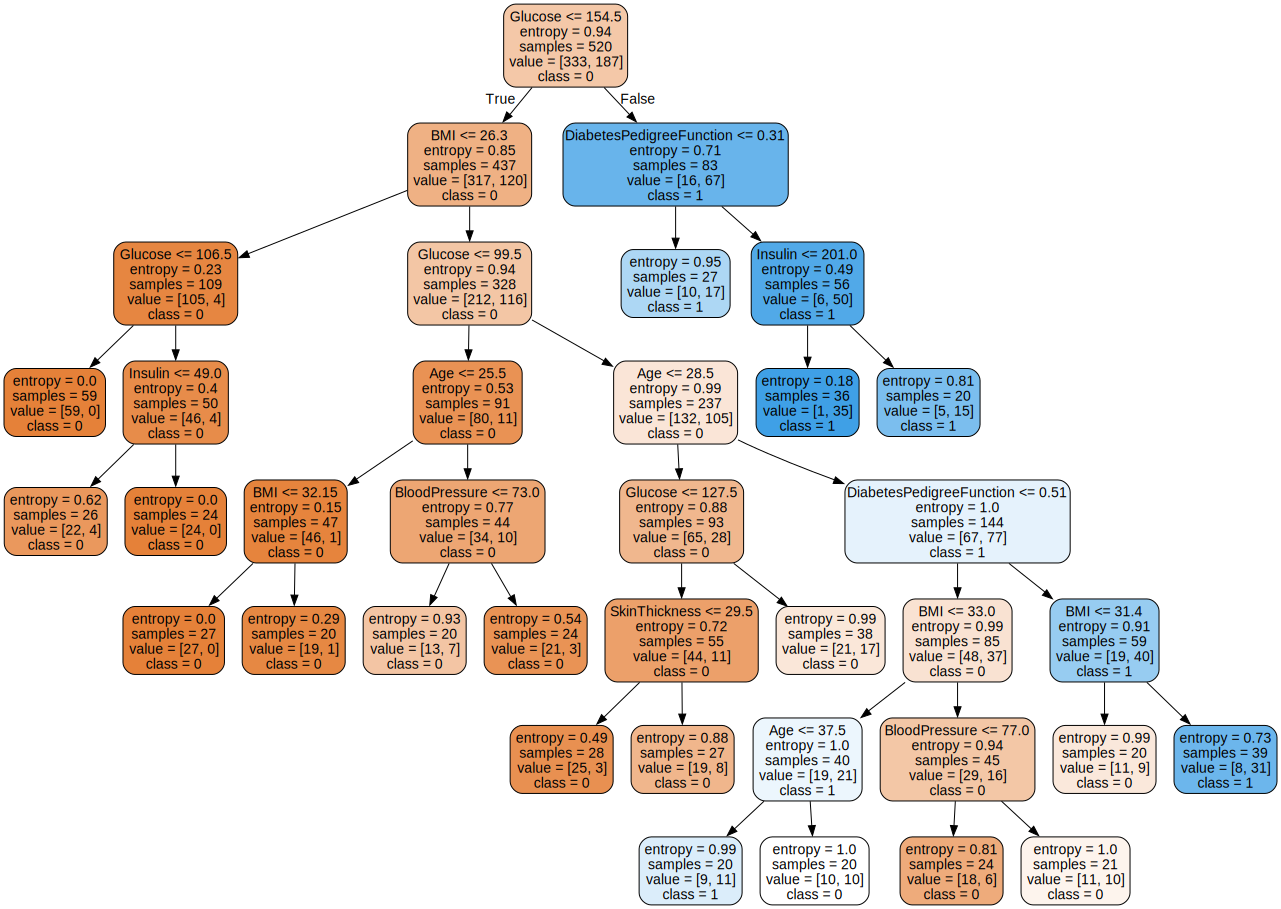

In [11]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(xtrain.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [12]:
clf.get_depth()

7

In [13]:
clf.score(xtest,ytest)

0.796875

In [14]:
predict = clf.predict(xtest)

In [15]:
print(classification_report(ytest, predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        92
           1       0.68      0.53      0.59        36

    accuracy                           0.80       128
   macro avg       0.75      0.71      0.73       128
weighted avg       0.79      0.80      0.79       128



In [16]:
print((0.86 + 0.59) / 2)

0.725


In [ ]:
df2

In [20]:
df2 = df1
df2 = df2.drop("Outcome", axis=1)
array = df2.to_numpy()

KeyError: "['Outcome'] not found in axis"

In [49]:
#Make a prediction for the patients 743, 715, 740, 741
predy = clf.predict([array[741]])
print(predy)

IndexError: index 741 is out of bounds for axis 0 with size 649